In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pickle

In [4]:
df = pd.read_csv('Admission_Prediction.csv')

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [6]:
df.shape

(500, 9)

In [7]:
df.info() #To check the null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            485 non-null float64
TOEFL Score          490 non-null float64
University Rating    485 non-null float64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(7), int64(2)
memory usage: 35.2 KB


In [10]:
df.isnull().sum() #T find the count of Missing values

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [13]:
df['GRE Score'].fillna(df['GRE Score'].mode()[0], inplace = True)

In [17]:
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0], inplace = True)

In [18]:
df['University Rating'].fillna(df['University Rating'].mean(), inplace = True)

In [19]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [20]:
#Define x and y

x = df.drop(['Chance of Admit', 'Serial No.'], axis = 1)

y = df['Chance of Admit']

In [21]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


In [24]:
x.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

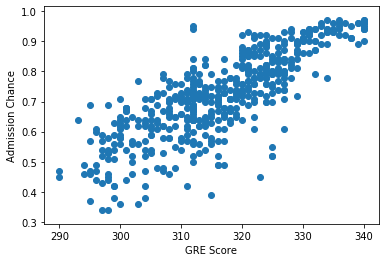

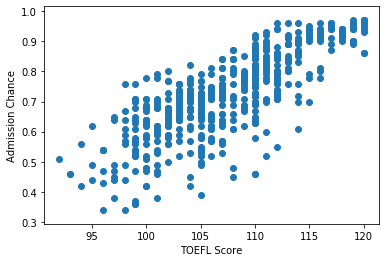

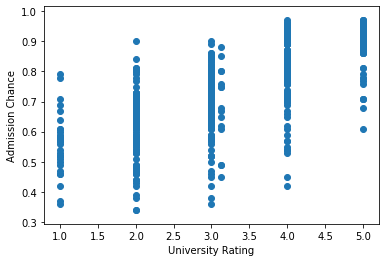

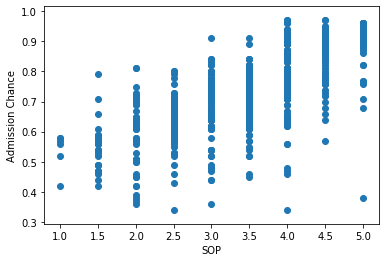

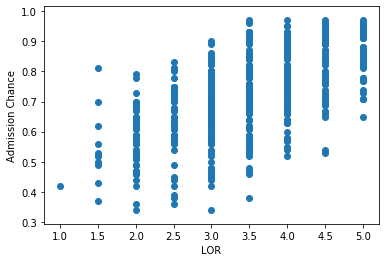

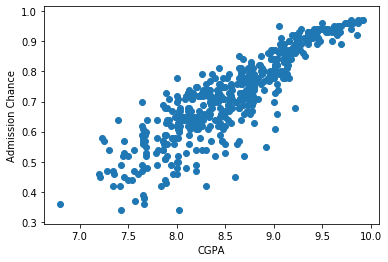

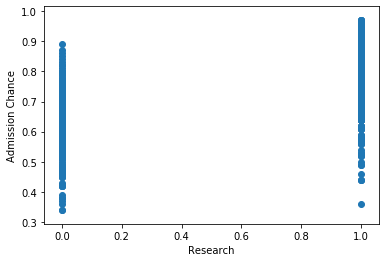

In [31]:
for col in x.columns:
    if col != ['Chance of Admit']:
        plt.scatter(x[col],y)
        plt.xlabel(col)
        plt.ylabel('Admission Chance')
        plt.show()

        
#WE are doing this to identify the relationship between x and y. if there is no relationship then we can delete certain columns from x

In [33]:
#Scaling the data: This is uswed to scale the data.Here we are not changing the meaning of the data. We are on only changingn the scale of the data

from sklearn.preprocessing import StandardScaler
scaler_feature = StandardScaler()

scaled_data = scaler_feature.fit_transform(x)
scaled_data

array([[ 1.85052822,  1.77547686,  0.77890565, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.68147064, -0.04027672,  0.77890565, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.39765943, -0.53548224, -0.1078766 , ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.22103568,  2.10561387,  1.66568791, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39765943, -0.70055074,  0.77890565, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.95125316,  0.95013432,  0.77890565, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [34]:
#This can be a option process. Hence we are not going to use this scaled data. Instead we will be using conventional x and y data

In [35]:
#Splitting the data into training and testing

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.33, random_state = 100)

In [36]:
#Fit the splitted data in Linear regresssion model (Training the Model)

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
#To calculate the accuracy of the model

from sklearn.metrics import r2_score
score = r2_score(reg.predict(test_x), test_y)
score

0.8076993525686706

In [39]:
reg.predict(test_x)

array([0.85868396, 0.47100161, 0.6280096 , 0.44578053, 0.64598598,
       0.85398867, 0.58423805, 0.6708053 , 0.81576593, 0.68391898,
       0.66322789, 0.60710496, 0.89390747, 0.76122405, 0.63653857,
       0.50101692, 0.5932031 , 0.74550918, 0.56026094, 0.71477719,
       0.89825968, 0.60985982, 0.85096431, 0.82326697, 0.99808338,
       0.60354515, 0.68321824, 0.93662411, 0.87713203, 0.70043558,
       0.78420399, 0.85380635, 0.7502154 , 0.55268936, 0.73961435,
       0.78262859, 0.79567973, 0.57756558, 0.54007331, 0.70184561,
       0.94815906, 0.58454502, 0.83942492, 0.78608391, 0.8110905 ,
       0.54729563, 0.59557674, 0.87410501, 0.95154098, 0.59880994,
       0.81659257, 0.70920574, 0.80814867, 0.99084397, 0.64359316,
       0.85476613, 0.6179743 , 0.89711609, 0.76941624, 0.73447114,
       0.68813814, 0.62390397, 0.47604256, 0.8832669 , 0.64759615,
       0.68476495, 0.70437717, 0.45943371, 0.84033595, 0.84308359,
       0.92763891, 0.77439541, 0.65730255, 0.83786836, 0.64625

In [40]:
# To deploy this model, first we need to save the model in Local file system

filename = 'finalized_model.pickle'

pickle.dump(reg, open(filename, 'wb'))

In [45]:
# To open and utilize (predict) the the model from pickle file

loaded_model = pickle.load(open(filename, 'rb'))
a = loaded_model.predict([[323, 120, 4, 4, 5, 8.5, 1]])
a

array([0.8027948])

In [50]:
#To predict directly from the model

reg.predict([[323, 120, 4, 4, 5, 8.5, 1]])

array([0.8027948])